# Check PSF shape in simulated data



In [1]:
from glob import glob
import os

import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_dir = '../../aspectblur'

In [3]:
def find_centroid(x, x0, width, func=np.mean):
    '''Find centroid of a distribution

    Parameters
    ----------
    x : np.array
    x0 : float
    starting guess
    width : float
    use only data values in ``x0 - width, x0 + width``
    func : callable
    '''
    ind = np.abs(x - x0) < width
    return func(x[ind])

In [4]:
def filter_data(obs):
    '''To reduce the background, cut to a region around the source and apply an energy filter
    In this energy range we have the most counts and we limited
    the simulations to the same range.
    
    This is most important for the observed data which does have some background, but 
    we apply the same filter to simulated ata, too, for consistency.
    '''
    ind = (obs['energy'] > 300) & (obs['energy'] < 3000)
    # reduce background by cutting in the likely region
    indposx = (obs['x'] > 4000) & (obs['x'] < 4150)
    indposy = (obs['y'] > 4000) & (obs['y'] < 4150)
    return obs[ind & indposx & indposy]

def bin_to_radial_histogram(data):
    centx = find_centroid(data['x'], 4096, 10)
    centy = find_centroid(data['y'], 4074, 10)

    xy = np.empty((2, len(data)))
    xy[0, :] = data['x'] - centx
    xy[1, :] = data['y'] - centy
    r = np.linalg.norm(xy, axis=0)

    return np.histogram(r, range=[0,5], bins=25)

In [5]:
def plot44(opt):
    if opt == 'edser':
        optshort = 'edser'
        obs = Table.read(os.path.join(data_dir, '15713', 'primary', 'acisf15713N002_evt2.fits'))
    elif opt == 'randomize':
        optshort = 'rand'
        obs = Table.read(os.path.join(data_dir, '15713', 'randomize', 'acisf15713_repro_evt2.fits'))
    else:
        raise ValueError('Only opt "edser" and "randomize" are supported for plotting.')
    
    # Read the observed data
    
    obsfiltered = filter_data(obs)
    obshistval, obshistedges = bin_to_radial_histogram(obsfiltered)
    
    fig = plt.figure(figsize=(12, 10))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    # Pot observed data
    for ax in [ax1, ax3]:
        ax.plot(0.5 * (obshistedges[:-1] + obshistedges[1:]), 
             1.0 * obshistval.cumsum() / obshistval.sum(), 
             c='k', lw=5, label='Observation')

    for i in range(10):
        for prog, color in zip(['marx', 'saotrace'], 'rb'):
            for postproc in (['', 'a_p_e']):
                if postproc == '':
                    name = '{0}run{1}{2}.fits'.format(prog, i, optshort)
                    label = '{0}'.format(prog)
                    ls = '-'
                else:
                    name = '{0}{1}a_p_e{2}.fits'.format(prog, i, optshort)
                    label = '{0} + a_p_e'.format(prog)
                    ls = ':'
                data = Table.read(os.path.join(data_dir, name))
                if postproc == '':
                    for c in data.colnames:
                        data.rename_column(c, c.lower())
            
                fdata = filter_data(data)
                histval, histedges = bin_to_radial_histogram(fdata)
                plotargs = {'alpha': 0.9, 'color': color, 'ls': ls}
                if i == 0:
                    plotargs['label'] = label            
    
                for ax in [ax1, ax3]:
                    ax.plot(0.5 * (histedges[1:] + histedges[:-1]),
                            1.0 * histval.cumsum() / histval.sum(),
                            **plotargs)
                for ax in [ax2, ax4]:
                    ax.plot(0.5 * (histedges[1:] + histedges[:-1]),
                            (1.0 * histval.cumsum() / histval.sum()) / (1.0 * obshistval.cumsum() / obshistval.sum()),
                             **plotargs)

    # Set polt labels, axis scale etc.
    for ax in [ax1, ax2, ax3, ax4]:
        ax.legend(loc='lower right')
        ax.set_title('ObsID 15713 - {0}'.format(opt.upper()))
        ax.set_xlabel('Radial distance from center [pix]')
    
    for ax in [ax1, ax2]:
        ax.set_xscale("log")
        ax.set_xlim([0.1, 5])
    
    for ax in [ax1, ax3]:
        ax.set_ylabel('ECF')

    for ax in [ax2, ax4]:
        ax.set_ylabel('ECF ratio simulated / observed')
        ax.plot(ax2.get_xlim(), [1, 1], 'k-')

    return fig

## EDSER processed data

/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater
/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less
/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in greater
/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in less


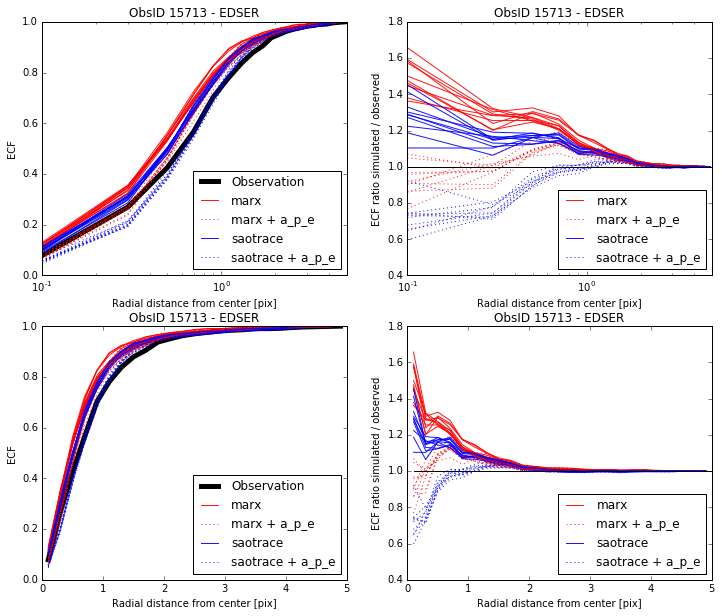

In [6]:
fig = plot44('edser')



**Fig. 1** Comparison of the encircled energy fraction for the central source of ObsID 15713 in observations and simulations. The top and bottom row show identical plots, except that the top row has a logarithmically scaled x-axis, while the bottom row has a linearly scaled axis to highlight different features. *left*: Encircled count fraction (ECF) as a function of radial distance from the center (see text for details). 

## RANDOMIZE

/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater
/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less
/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in greater
/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in less


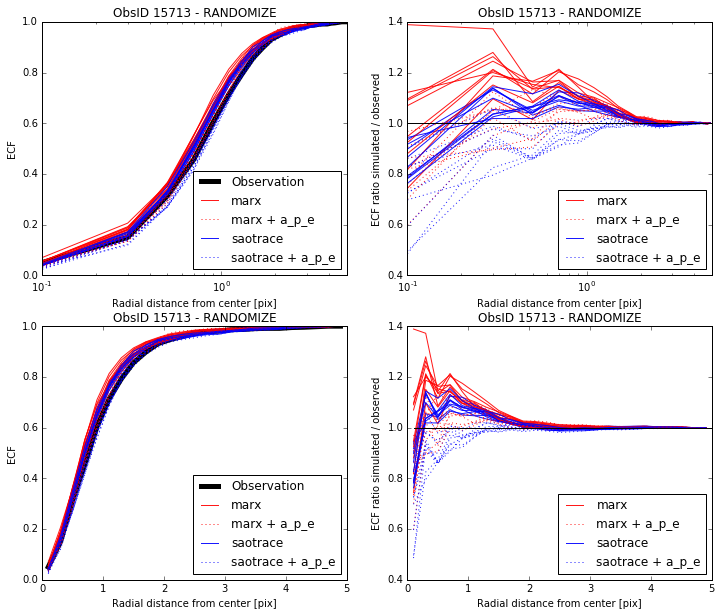

In [7]:
fig = plot44('randomize')